In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
import shapely
from shapely import geometry
from shapely import wkt
%matplotlib inline

In [2]:
rail_station_count =pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\metro_area.csv').drop(columns = 'Unnamed: 0')

In [3]:
geometry = rail_station_count['geometry'].map(shapely.wkt.loads)
rail_station_count = rail_station_count.drop('geometry', axis=1)
rail_station_count = gpd.GeoDataFrame(rail_station_count, geometry=geometry)
rail_station_count = rail_station_count.set_crs("EPSG:4326")

# buffer = 300

In [37]:
rail_station = rail_station_count.to_crs("EPSG:32649")
rail_station['buffer'] = rail_station.buffer(300)

In [38]:
rail_station

,linename,stationnam,sl,poiid,lg,sp,lon,lat,index_right,hex_id,cluster_la,functional,function_1,geometry,buffer
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,2414,30444,0,Rural,4,POINT (820809.311 2495070.993),"POLYGON ((821109.311 2495070.993, 821107.866 2..."
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,2414,30444,0,Rural,4,POINT (820748.669 2495450.082),"POLYGON ((821048.669 2495450.082, 821047.224 2..."
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,2415,30445,1,Center,1,POINT (820816.745 2495913.339),"POLYGON ((821116.745 2495913.339, 821115.300 2..."
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,2411,30441,1,Center,1,POINT (820603.435 2496413.511),"POLYGON ((820903.435 2496413.511, 820901.990 2..."
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,2410,30440,1,Center,1,POINT (819669.497 2496124.436),"POLYGON ((819969.497 2496124.436, 819968.052 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,地铁11号线,福永,"113.806076,22.673562",BV10249452,0,FuYong,113.806076,22.673562,1433,18097,2,Sub-center,2,POINT (788339.380 2510107.183),"POLYGON ((788639.380 2510107.183, 788637.935 2..."
230,地铁11号线,机场,"113.813663,22.624026",BV10527864,6,ji chang,113.813663,22.624026,944,10976,3,Outskirt,3,POINT (789223.295 2504633.877),"POLYGON ((789523.295 2504633.877, 789521.850 2..."
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,1960,24808,1,Center,1,POINT (793691.303 2499293.417),"POLYGON ((793991.303 2499293.417, 793989.858 2..."
232,地铁11号线,宝安,"113.880396,22.554590",BV10527865,6,bao an,113.880396,22.554590,2574,33438,1,Center,1,POINT (796235.679 2497072.139),"POLYGON ((796535.679 2497072.139, 796534.234 2..."


In [6]:
bike_trip = pd.read_csv(r'D:\bike\data\result_clean_data.csv')

In [7]:
bike_trip.head()

,Unnamed: 0,region_name,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,0,罗湖,4cb66c3b6f143fdf91a240**********,2021-08-20 16:23:25,22.541537,114.119216,2021-08-20 16:26:00,114.115918,22.544259,0 days 00:02:35,2.583333,454.249581
1,1,罗湖,5dc255df8453b722152b27**********,2021-08-26 19:07:55,22.651706,114.020577,2021-08-26 19:21:43,114.017225,22.663865,0 days 00:13:48,13.800000,1395.114376
2,2,罗湖,4cb66c3b6f143fdf91a240**********,2021-08-20 16:23:25,22.541537,114.119216,2021-08-20 16:26:00,114.115918,22.544259,0 days 00:02:35,2.583333,454.249581
3,3,罗湖,5dc255df8453b722152b27**********,2021-08-26 19:07:55,22.651706,114.020577,2021-08-26 19:21:43,114.017225,22.663865,0 days 00:13:48,13.800000,1395.114376
4,4,龙华,4cb66c3b6f143fdf91a240**********,2021-08-20 16:23:25,22.541537,114.119216,2021-08-20 16:26:00,114.115918,22.544259,0 days 00:02:35,2.583333,454.249581


In [8]:
bike_trip['START_TIME'] = bike_trip['START_TIME'].astype('datetime64')
bike_trip['END_TIME'] = bike_trip['END_TIME'].astype('datetime64')

In [9]:
bike_trip_2021826_D = bike_trip[(bike_trip['END_TIME']>='2021-08-26 06:00:00')&(bike_trip['END_TIME']<='2021-08-26 23:00:00')]

## Access_integrated_use

In [10]:
# 提取 2021-08-26 6：00-23：00(8.)之间的数据。

In [11]:
bike_trip_2021826_O = bike_trip[(bike_trip['START_TIME']>='2021-08-26 06:00:00')&(bike_trip['START_TIME']<='2021-08-26 23:00:00')]

In [12]:
bike_trip_2021826_O

,Unnamed: 0,region_name,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
1,1,罗湖,5dc255df8453b722152b27**********,2021-08-26 19:07:55,22.651706,114.020577,2021-08-26 19:21:43,114.017225,22.663865,0 days 00:13:48,13.800000,1395.114376
3,3,罗湖,5dc255df8453b722152b27**********,2021-08-26 19:07:55,22.651706,114.020577,2021-08-26 19:21:43,114.017225,22.663865,0 days 00:13:48,13.800000,1395.114376
5,5,龙华,5dc255df8453b722152b27**********,2021-08-26 19:07:55,22.651706,114.020577,2021-08-26 19:21:43,114.017225,22.663865,0 days 00:13:48,13.800000,1395.114376
7,7,龙华,5dc255df8453b722152b27**********,2021-08-26 19:07:55,22.651706,114.020577,2021-08-26 19:21:43,114.017225,22.663865,0 days 00:13:48,13.800000,1395.114376
9,9,罗湖,719ff2c469e81cc7136a7f**********,2021-08-26 18:15:05,22.551473,113.907821,2021-08-26 18:49:58,113.870992,22.569077,0 days 00:34:53,34.883333,4258.392843
...,...,...,...,...,...,...,...,...,...,...,...,...
40946796,41466556,大鹏,acf5827f3427526abaeae4**********,2021-08-26 18:36:57,22.636584,114.376526,2021-08-26 19:01:38,114.333717,22.679470,0 days 00:24:41,24.683333,6483.585233
40946797,41466557,大鹏,9b6f9152d059c94da53b39**********,2021-08-26 18:47:35,22.633301,114.408326,2021-08-26 19:01:42,114.368672,22.681169,0 days 00:14:07,14.116667,6699.849024
40946798,41466558,大鹏,29722553b1a3890b6ae5cd**********,2021-08-26 18:15:02,22.641996,114.392130,2021-08-26 19:02:10,114.369323,22.676260,0 days 00:47:08,47.133333,4471.337309
40946800,41466560,大鹏,2e3ab487c5e9768feffdbf**********,2021-08-26 21:56:40,22.629922,114.372233,2021-08-26 22:00:19,114.359651,22.671904,0 days 00:03:39,3.650000,4843.449771


In [13]:
bike_trip_2021826_O = gpd.GeoDataFrame(bike_trip_2021826_O,
                 geometry = gpd.points_from_xy(bike_trip_2021826_O['START_LNG'],bike_trip_2021826_O['START_LAT']),crs='epsg:4326')

In [14]:
bike_trip_2021826_O = bike_trip_2021826_O.to_crs("EPSG:32649")

In [39]:
rail_station_buffer = gpd.GeoDataFrame(rail_station,geometry = 'buffer')

In [40]:
rail_station_buffer.head()

,linename,stationnam,sl,poiid,lg,sp,lon,lat,index_right,hex_id,cluster_la,functional,function_1,geometry,buffer
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,2414,30444,0,Rural,4,POINT (820809.311 2495070.993),"POLYGON ((821109.311 2495070.993, 821107.866 2..."
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,2414,30444,0,Rural,4,POINT (820748.669 2495450.082),"POLYGON ((821048.669 2495450.082, 821047.224 2..."
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,2415,30445,1,Center,1,POINT (820816.745 2495913.339),"POLYGON ((821116.745 2495913.339, 821115.300 2..."
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,2411,30441,1,Center,1,POINT (820603.435 2496413.511),"POLYGON ((820903.435 2496413.511, 820901.990 2..."
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,2410,30440,1,Center,1,POINT (819669.497 2496124.436),"POLYGON ((819969.497 2496124.436, 819968.052 2..."


In [41]:
rail_station_buffer = rail_station_buffer.drop(columns = 'index_right')

In [42]:
rail_station_buffer_2021826_O = rail_station_buffer.sjoin(bike_trip_2021826_O, how='inner', predicate='contains' )

In [43]:
rail_station_buffer_2021826_O.head()

,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,cluster_la,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,03b35773ad1af62153de6f**********,2021-08-26 18:38:39,22.531033,114.119035,2021-08-26 19:01:17,114.117740,22.537617,0 days 00:22:38,22.633333,744.069041
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,03b35773ad1af62153de6f**********,2021-08-26 18:38:39,22.531033,114.119035,2021-08-26 19:01:17,114.117740,22.537617,0 days 00:22:38,22.633333,744.069041
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,645a27e547d4d91a1d8846**********,2021-08-26 19:03:49,22.533093,114.119551,2021-08-26 19:15:13,114.121574,22.535870,0 days 00:11:24,11.400000,372.205317
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,7b492e518f341b9ed11819**********,2021-08-26 21:01:33,22.533177,114.116250,2021-08-26 21:05:23,114.113794,22.534623,0 days 00:03:50,3.833333,299.195539
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,7b492e518f341b9ed11819**********,2021-08-26 21:01:33,22.533177,114.116250,2021-08-26 21:05:23,114.113794,22.534623,0 days 00:03:50,3.833333,299.195539


In [44]:
rail_station_buffer_2021826_O.to_csv(r'D:\bike\code\metro\Preprocessing-bike data\rail_station_buffer_2021826_O.csv',encoding = 'utf-8-sig')

In [45]:
metro_area_count_O = rail_station_buffer_2021826_O.groupby('functional').count()
metro_area_count_O = metro_area_count_O.reset_index()
metro_area_count_O

,functional,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,Center,255348,255348,255348,255348,255348,255348,255348,255348,255348,...,255348,255348,255348,255348,255348,255348,255348,255348,255348,255348
1,Outskirt,157098,157098,157098,157098,157098,157098,157098,157098,157098,...,157098,157098,157098,157098,157098,157098,157098,157098,157098,157098
2,Rural,64277,64277,64277,64277,64277,64277,64277,64277,64277,...,64277,64277,64277,64277,64277,64277,64277,64277,64277,64277
3,Sub-center,391937,391937,391937,391937,391937,391937,391937,391937,391937,...,391937,391937,391937,391937,391937,391937,391937,391937,391937,391937


In [115]:
# save dependent variables

Egress_integrated = rail_station_buffer_2021826_O.groupby('stationnam').count()
Egress_integrated = Egress_integrated.reset_index()
Egress_integrated_ues['stationnam'] = Egress_integrated['stationnam']
Egress_integrated_ues['trips_O'] = Egress_integrated['linename']

In [116]:
Egress_integrated = rail_station_buffer_2021826_O.groupby('stationnam').mean()
Egress_integrated = Egress_integrated.reset_index()
Egress_integrated_ues['BIKE_MINU_O'] = Egress_integrated['BIKE_MINU']
Egress_integrated_ues['Bike_Travel_Distance_O'] = Egress_integrated['Bike_Travel_Distance']

<ipython-input-116-d21379081fcd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Egress_integrated = rail_station_buffer_2021826_O.groupby('stationnam').mean()


In [119]:
Egress_integrated_ues

,stationnam,linename,BIKE_MINU,Bike_Travel_Distance,trips_O,BIKE_MINU_O,Bike_Travel_Distance_O
0,上塘,2996,9.638156,898.131223,2996,9.638156,898.131223
1,上屋,1212,14.610355,1509.167135,1212,14.610355,1509.167135
2,上李朗,140,13.239881,2084.856563,140,13.239881,2084.856563
3,上梅林,1771,9.629682,1175.596731,1771,9.629682,1175.596731
4,上水径,22,11.120455,2489.976194,22,11.120455,2489.976194
...,...,...,...,...,...,...,...
223,黄贝岭,2271,10.598173,795.047008,2271,10.598173,795.047008
224,龙井,1395,8.394409,792.297796,1395,8.394409,792.297796
225,龙华,3167,12.393306,1145.971104,3167,12.393306,1145.971104
226,龙城广场,493,16.074983,1140.368372,493,16.074983,1140.368372


In [118]:
Egress_integrated_ues.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\variable\Egress_integrated_ues.csv",encoding = 'utf-8-sig')

## Egress_integrated_use

In [22]:
# 提取 2021-08-26 6：00-23：00(8.)之间的数据。

In [121]:
bike_trip_2021826_D = bike_trip[(bike_trip['END_TIME']>='2021-08-26 06:00:00')&(bike_trip['END_TIME']<='2021-08-26 23:00:00')]

In [122]:
bike_trip_2021826_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043444 entries, 1 to 40946802
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   region_name           object        
 2   USER_ID               object        
 3   START_TIME            datetime64[ns]
 4   START_LAT             float64       
 5   START_LNG             float64       
 6   END_TIME              datetime64[ns]
 7   END_LNG               float64       
 8   END_LAT               float64       
 9   BIKE_TIME             object        
 10  BIKE_MINU             float64       
 11  Bike_Travel_Distance  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(3)
memory usage: 301.9+ MB


In [123]:
bike_trip_2021826_D = gpd.GeoDataFrame(bike_trip_2021826_D,
                 geometry = gpd.points_from_xy(bike_trip_2021826_D['END_LNG'],bike_trip_2021826_D['END_LAT']),crs='epsg:4326')

In [124]:
bike_trip_2021826_D = bike_trip_2021826_D.to_crs("EPSG:32649")

In [125]:
rail_station_buffer_2021826_D = rail_station_buffer.sjoin(bike_trip_2021826_D, how='inner', predicate='contains' )

In [126]:
rail_station_buffer_2021826_D.to_csv(r'D:\bike\code\metro\Preprocessing-bike data\rail_station_buffer_2021826_D.csv',encoding = 'utf-8-sig')

In [127]:
metro_area_count_D = rail_station_buffer_2021826_D.groupby('functional').count()
metro_area_count_D = metro_area_count_D.reset_index()
metro_area_count_D

,functional,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,Center,213381,213381,213381,213381,213381,213381,213381,213381,213381,...,213381,213381,213381,213381,213381,213381,213381,213381,213381,213381
1,Outskirt,132819,132819,132819,132819,132819,132819,132819,132819,132819,...,132819,132819,132819,132819,132819,132819,132819,132819,132819,132819
2,Rural,54832,54832,54832,54832,54832,54832,54832,54832,54832,...,54832,54832,54832,54832,54832,54832,54832,54832,54832,54832
3,Sub-center,316459,316459,316459,316459,316459,316459,316459,316459,316459,...,316459,316459,316459,316459,316459,316459,316459,316459,316459,316459


In [136]:
metro_area_count_D = rail_station_buffer_2021826_D.groupby('functional').mean()
metro_area_count_D

<ipython-input-136-f7351d62ed3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metro_area_count_D = rail_station_buffer_2021826_D.groupby('functional').mean()


,lg,lon,lat,hex_id,cluster_la,function_1,index_right,Unnamed: 0,START_LAT,START_LNG,END_LNG,END_LAT,BIKE_MINU,Bike_Travel_Distance
functional,,,,,,,,,,,,,,
Center,3.075574,114.009550,22.553281,19564.768667,1.0,1.0,2.066644e+07,2.096512e+07,22.553505,114.010159,114.009618,22.553277,10.938059,967.772109
Outskirt,2.895181,113.966418,22.582927,16458.602015,3.0,3.0,2.422558e+07,2.456494e+07,22.582265,113.965419,113.966446,22.582997,12.059124,1090.072580
Rural,1.961701,114.031165,22.559648,20406.545539,0.0,4.0,2.059194e+07,2.088831e+07,22.561591,114.029336,114.031032,22.559858,11.549735,923.757893
Sub-center,3.133505,114.019177,22.582339,13785.902107,2.0,2.0,2.391964e+07,2.425377e+07,22.582488,114.018597,114.019171,22.582328,11.123832,1012.307502


In [131]:
# save dependent variables

Access_integrated = rail_station_buffer_2021826_D.groupby('stationnam').count()
Access_integrated = Access_integrated.reset_index()
Access_integrated_ues = pd.DataFrame()
Access_integrated_ues['stationnam'] = Access_integrated['stationnam']
Access_integrated_ues['trips_D'] = Access_integrated['linename']

In [132]:
Access_integrated = rail_station_buffer_2021826_O.groupby('stationnam').mean()
Access_integrated = Access_integrated.reset_index()
Access_integrated_ues['BIKE_MINU_D'] = Egress_integrated['BIKE_MINU']
Access_integrated_ues['Bike_Travel_Distance_D'] = Egress_integrated['Bike_Travel_Distance']

<ipython-input-132-f459c18e4e8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Access_integrated = rail_station_buffer_2021826_O.groupby('stationnam').mean()


In [133]:
Access_integrated_ues

,stationnam,trips_D,BIKE_MINU_D,Bike_Travel_Distance_D
0,上塘,3171,9.638156,898.131223
1,上屋,1490,14.610355,1509.167135
2,上李朗,155,13.239881,2084.856563
3,上梅林,5349,9.629682,1175.596731
4,上水径,608,11.120455,2489.976194
...,...,...,...,...
229,黄贝岭,7110,NaN,NaN
230,龙井,1947,NaN,NaN
231,龙华,10552,NaN,NaN
232,龙城广场,874,NaN,NaN


In [134]:
Access_integrated_ues.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\variable\Access_integrated_ues.csv",encoding = 'utf-8-sig')

## plot

In [5]:
rail_station_buffer_2021826_D = pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\rail_station_buffer_2021826_D.csv')

In [6]:
rail_station_buffer_2021826_O = pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\rail_station_buffer_2021826_O.csv')

In [17]:
metro_area_count_O = rail_station_buffer_2021826_O.groupby('functional').count()
metro_area_count_O = metro_area_count_O.reset_index()

metro_area_count_D = rail_station_buffer_2021826_D.groupby('functional').count()
metro_area_count_D = metro_area_count_D.reset_index()


In [18]:
metro_area_count_D = metro_area_count_D[['functional','function_1']]
metro_area_count_O = metro_area_count_O[['functional','function_1']]
df = metro_area_count_O.merge(metro_area_count_D, on = 'functional')
df = df.rename(columns = {'function_1_x':'Access-integrated use'})
df = df.rename(columns = {'function_1_y':'Egress-integrated use'})

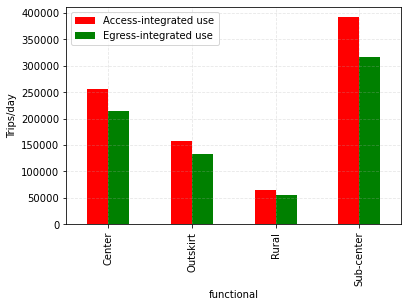

In [9]:
df.plot.bar('functional',['Access-integrated use','Egress-integrated use'],color = ['Red','Green'])
plt.ylabel('Trips/day')  # 纵坐标轴标题
plt.grid(ls='--',alpha=0.3)
plt.rc('legend', fontsize='medium')

In [22]:
metro_area_count_D.iloc[0:1,1]  = metro_area_count_D.iloc[0:1,1] / 43
metro_area_count_D.iloc[1:2,1]  = metro_area_count_D.iloc[1:2,1] / 63
metro_area_count_D.iloc[2:3,1]  = metro_area_count_D.iloc[2:3,1] / 42
metro_area_count_D.iloc[3:4,1]  = metro_area_count_D.iloc[3:4,1] / 86

In [20]:
metro_area_count_O.iloc[0:1,1]  = metro_area_count_O.iloc[0:1,1] / 43
metro_area_count_O.iloc[1:2,1]  = metro_area_count_O.iloc[1:2,1] / 63
metro_area_count_O.iloc[2:3,1]  = metro_area_count_O.iloc[2:3,1] / 42
metro_area_count_O.iloc[3:4,1]  = metro_area_count_O.iloc[3:4,1] / 86

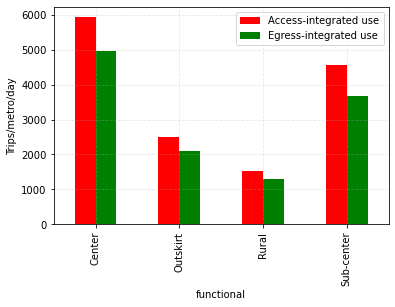

In [23]:
df = metro_area_count_O.merge(metro_area_count_D, on = 'functional')
df = df.rename(columns = {'function_1_x':'Access-integrated use'})
df = df.rename(columns = {'function_1_y':'Egress-integrated use'})
df.plot.bar('functional',['Access-integrated use','Egress-integrated use'],color = ['Red','Green'])
plt.ylabel('Trips/metro/day')  # 纵坐标轴标题
plt.grid(ls='--',alpha=0.3)
plt.rc('legend', fontsize='medium')

In [ ]:
metro_area_count_D = metro_area_count_D[['functional','function_1']]
metro_area_count_O = metro_area_count_O[['functional','function_1']]
df = metro_area_count_O.merge(metro_area_count_D, on = 'functional')
df = df.rename(columns = {'function_1_x':'Access-integrated use'})
df = df.rename(columns = {'function_1_y':'Egress-integrated use'})

In [58]:
rail_station_buffer_2021826_O.columns

Index(['Unnamed: 0.1', 'linename', 'stationnam', 'sl', 'poiid', 'lg', 'sp',
       'lon', 'lat', 'hex_id', 'cluster_la', 'functional', 'function_1',
       'geometry', 'buffer', 'index_right', 'Unnamed: 0', 'region_name',
       'USER_ID', 'START_TIME', 'START_LAT', 'START_LNG', 'END_TIME',
       'END_LNG', 'END_LAT', 'BIKE_TIME', 'BIKE_MINU', 'Bike_Travel_Distance'],
      dtype='object')

In [59]:
df1 = rail_station_buffer_2021826_O[['functional','Unnamed: 0']]
df2 = rail_station_buffer_2021826_D[['functional','Unnamed: 0']]
#按车ID拼接
df3 = df1.merge(df2,on ='Unnamed: 0',how = 'inner')

In [60]:
df3

,functional_x,Unnamed: 0,functional_y
0,Rural,41373420,Rural
1,Rural,41373420,Center
2,Rural,41373422,Rural
3,Rural,41373422,Center
4,Rural,41373846,Rural
...,...,...,...
195630,Center,7378799,Center
195631,Center,7586819,Center
195632,Center,7586817,Center
195633,Center,7586815,Center


In [61]:
df4 = df3.groupby(by = ['functional_x','functional_y']).count().reset_index()
df4

,functional_x,functional_y,Unnamed: 0
0,Center,Center,43159
1,Center,Outskirt,6385
2,Center,Rural,5967
3,Center,Sub-center,14394
4,Outskirt,Center,7239
5,Outskirt,Outskirt,16229
6,Outskirt,Rural,803
7,Outskirt,Sub-center,6547
8,Rural,Center,5229
9,Rural,Outskirt,903


In [62]:
df_plot = df4.pivot('functional_x','functional_y','Unnamed: 0')

<ipython-input-62-08106de3b564>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_plot = df4.pivot('functional_x','functional_y','Unnamed: 0')


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Center'),
  Text(1.5, 0, 'Outskirt'),
  Text(2.5, 0, 'Rural'),
  Text(3.5, 0, 'Sub-center')])

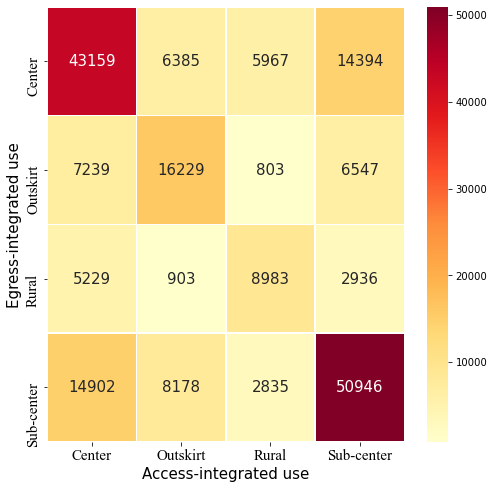

In [63]:
fig,ax=plt.subplots(figsize=(8,8))
ax = sns.heatmap(df_plot,annot=True,linewidths=.5,fmt="d",cmap='YlOrRd',center=None,annot_kws= {'fontsize':15,'label':'Trips/day'})

plt.xlabel('Access-integrated use',fontsize=15)
plt.ylabel('Egress-integrated use',fontsize=15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.xticks(fontproperties = 'Times New Roman', size = 15)


# hour trips

## Access_integrated_ues

In [5]:
rail_station_buffer_2021826_D = pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\rail_station_buffer_2021826_D.csv').drop(columns = 'Unnamed: 0')

In [6]:
rail_station_buffer_2021826_D

,Unnamed: 0.1,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,...,c15963cb4789dd14638ee2**********,2021-08-26 19:59:00,22.542532,114.083731,2021-08-26 21:01:25,114.118531,22.534671,0 days 01:02:25,62.416667,3679.326872
1,1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,30444,...,c15963cb4789dd14638ee2**********,2021-08-26 19:59:00,22.542532,114.083731,2021-08-26 21:01:25,114.118531,22.534671,0 days 01:02:25,62.416667,3679.326872
2,0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,...,c15963cb4789dd14638ee2**********,2021-08-26 19:59:00,22.542532,114.083731,2021-08-26 21:01:25,114.118531,22.534671,0 days 01:02:25,62.416667,3679.326872
3,1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,30444,...,c15963cb4789dd14638ee2**********,2021-08-26 19:59:00,22.542532,114.083731,2021-08-26 21:01:25,114.118531,22.534671,0 days 01:02:25,62.416667,3679.326872
4,0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,...,c15963cb4789dd14638ee2**********,2021-08-26 19:59:00,22.542532,114.083731,2021-08-26 21:01:25,114.118531,22.534671,0 days 01:02:25,62.416667,3679.326872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717486,233,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,...,47ce9624950b082d39d41b**********,2021-08-26 20:06:36,22.523913,113.923971,2021-08-26 20:09:14,113.923352,22.521368,0 days 00:02:38,2.633333,289.970670
717487,233,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,...,47ce9624950b082d39d41b**********,2021-08-26 20:06:36,22.523913,113.923971,2021-08-26 20:09:14,113.923352,22.521368,0 days 00:02:38,2.633333,289.970670
717488,233,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,...,5da4e008522fa9132ac4aa**********,2021-08-26 08:39:45,22.510185,113.927076,2021-08-26 08:48:17,113.923720,22.521364,0 days 00:08:32,8.533333,1289.993837
717489,233,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,...,d5a5b7c6b1b56391b43108**********,2021-08-26 10:12:24,22.519727,113.933502,2021-08-26 10:19:27,113.923505,22.521369,0 days 00:07:03,7.050000,1042.882550


In [10]:
rail_station_buffer_2021826_D['START_TIME'] = rail_station_buffer_2021826_D['START_TIME'].astype('datetime64')
rail_station_buffer_2021826_D['END_TIME'] = rail_station_buffer_2021826_D['END_TIME'].astype('datetime64')

<ipython-input-10-a9e54bb507d9>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  rail_station_buffer_2021826_D['START_TIME'] = rail_station_buffer_2021826_D['START_TIME'].astype('datetime64')
<ipython-input-10-a9e54bb507d9>:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  rail_station_buffer_2021826_D['END_TIME'] = rail_station_buffer_2021826_D['END_TIME'].astype('datetime64')


In [15]:
#修改为小时格式，方便统计小时trips和后面天气变量合并
rail_station_buffer_2021826_D['hour']= rail_station_buffer_2021826_D['END_TIME'].dt.strftime("%Y-%m-%d %H")


In [16]:
metro_area_count_D = rail_station_buffer_2021826_D.groupby(['functional','hour']).count()
metro_area_count_D = metro_area_count_D.reset_index()
metro_area_count_D

,functional,hour,Unnamed: 0.1,linename,stationnam,sl,poiid,lg,sp,lon,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,Center,2021-08-26 06,3299,3299,3299,3299,3299,3299,3299,3299,...,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299
1,Center,2021-08-26 07,13564,13564,13564,13564,13564,13564,13564,13564,...,13564,13564,13564,13564,13564,13564,13564,13564,13564,13564
2,Center,2021-08-26 08,21062,21062,21062,21062,21062,21062,21062,21062,...,21062,21062,21062,21062,21062,21062,21062,21062,21062,21062
3,Center,2021-08-26 09,9313,9313,9313,9313,9313,9313,9313,9313,...,9313,9313,9313,9313,9313,9313,9313,9313,9313,9313
4,Center,2021-08-26 10,4553,4553,4553,4553,4553,4553,4553,4553,...,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Sub-center,2021-08-26 18,30448,30448,30448,30448,30448,30448,30448,30448,...,30448,30448,30448,30448,30448,30448,30448,30448,30448,30448
65,Sub-center,2021-08-26 19,56162,56162,56162,56162,56162,56162,56162,56162,...,56162,56162,56162,56162,56162,56162,56162,56162,56162,56162
66,Sub-center,2021-08-26 20,40483,40483,40483,40483,40483,40483,40483,40483,...,40483,40483,40483,40483,40483,40483,40483,40483,40483,40483
67,Sub-center,2021-08-26 21,34722,34722,34722,34722,34722,34722,34722,34722,...,34722,34722,34722,34722,34722,34722,34722,34722,34722,34722


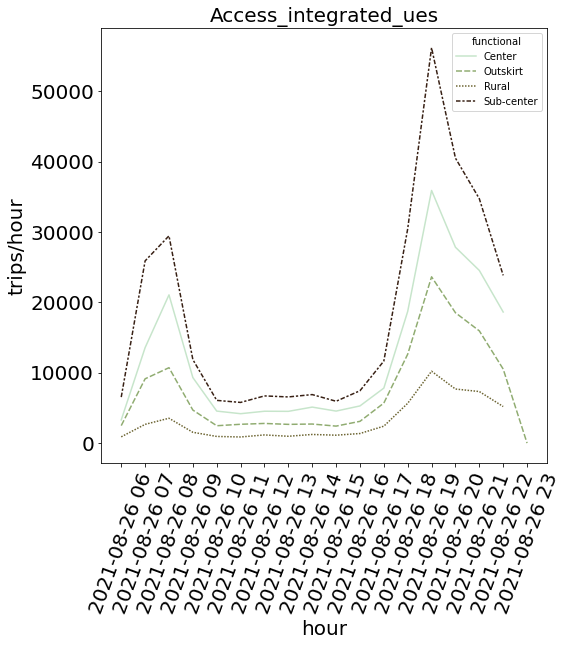

In [27]:
# plot Trips sum
fig, ax = plt.subplots(1,1,figsize=(8, 8))
g = sns.lineplot(x='hour', y="stationnam", hue="functional",style="functional",palette='ch:0.95',data=metro_area_count_D)
g.set_title('Access_integrated_ues',fontsize = 20 )
g.set_ylabel('trips/hour', fontsize=20) #设置Y坐标轴标签字体
g.set_xlabel('hour', fontsize=20) #设置X坐标轴标签字体
g.tick_params(labelsize=20)
plt.xticks(rotation=70)
plt.savefig("High resoltion.png",dpi=600)  #高分辨率保存

In [35]:
# 计算均值
Metro_stations_count = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\Metro_stations_count.csv",encoding = 'utf-8-sig')
Metro_stations_count = Metro_stations_count.merge(metro_area_count_D, how = 'inner',on = 'functional')
Metro_stations_count['mean']= Metro_stations_count['stationnam']/Metro_stations_count['function_1_x']
Metro_stations_count.head()

,Unnamed: 0,functional,function_1_x,hour,Unnamed: 0.1,linename,stationnam,sl,poiid,lg,...,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance,mean
0,0,Center,43,2021-08-26 06,3299,3299,3299,3299,3299,3299,...,3299,3299,3299,3299,3299,3299,3299,3299,3299,76.720930
1,0,Center,43,2021-08-26 07,13564,13564,13564,13564,13564,13564,...,13564,13564,13564,13564,13564,13564,13564,13564,13564,315.441860
2,0,Center,43,2021-08-26 08,21062,21062,21062,21062,21062,21062,...,21062,21062,21062,21062,21062,21062,21062,21062,21062,489.813953
3,0,Center,43,2021-08-26 09,9313,9313,9313,9313,9313,9313,...,9313,9313,9313,9313,9313,9313,9313,9313,9313,216.581395
4,0,Center,43,2021-08-26 10,4553,4553,4553,4553,4553,4553,...,4553,4553,4553,4553,4553,4553,4553,4553,4553,105.883721


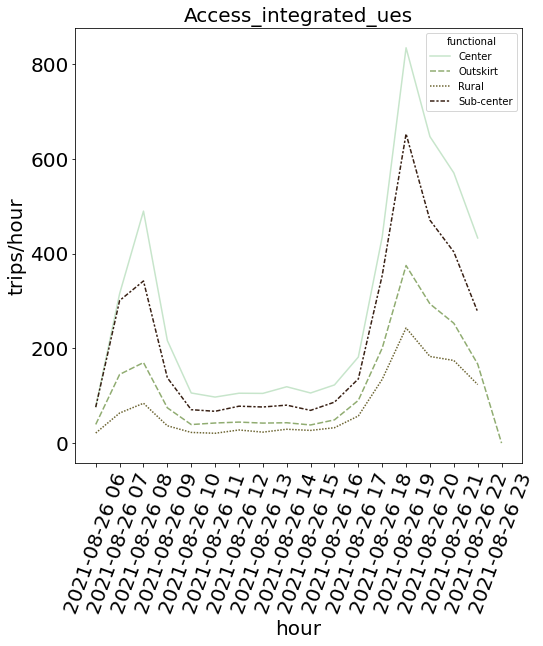

In [36]:
# plot trips mean

fig, ax = plt.subplots(1,1,figsize=(8, 8))
g = sns.lineplot(x='hour', y="mean", hue="functional",style="functional",palette='ch:0.95',data=Metro_stations_count)
g.set_title('Access_integrated_ues',fontsize = 20 )
g.set_ylabel('trips/hour', fontsize=20) #设置Y坐标轴标签字体
g.set_xlabel('hour', fontsize=20) #设置X坐标轴标签字体
g.tick_params(labelsize=20)
plt.xticks(rotation=70)
plt.savefig("High resoltion.png",dpi=600)  #高分辨率保存

In [19]:
# save dependent variables

Access_integrated = rail_station_buffer_2021826_D.groupby(['stationnam','hour']).count()

Access_integrated = Access_integrated.reset_index()
Access_integrated_ues = pd.DataFrame()
Access_integrated_ues['stationnam'] = Access_integrated['stationnam']
Access_integrated_ues['hour_D'] = Access_integrated['hour']
Access_integrated_ues['trips_D'] = Access_integrated['linename']

In [20]:
Access_integrated_ues

,stationnam,hour,trips_D
0,上塘,2021-08-26 06,73
1,上塘,2021-08-26 07,526
2,上塘,2021-08-26 08,338
3,上塘,2021-08-26 09,114
4,上塘,2021-08-26 10,66
...,...,...,...
3795,龙胜,2021-08-26 18,444
3796,龙胜,2021-08-26 19,572
3797,龙胜,2021-08-26 20,448
3798,龙胜,2021-08-26 21,268


In [37]:
Access_integrated_ues.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\variable\Access_integrated_ues_hour.csv",encoding = 'utf-8-sig')

## Egress_integrated_ues

In [4]:
rail_station_buffer_2021826_O = pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\rail_station_buffer_2021826_O.csv').drop(columns = 'Unnamed: 0.1')

In [5]:
rail_station_buffer_2021826_O

,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,cluster_la,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,03b35773ad1af62153de6f**********,2021-08-26 18:38:39,22.531033,114.119035,2021-08-26 19:01:17,114.117740,22.537617,0 days 00:22:38,22.633333,744.069041
1,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,03b35773ad1af62153de6f**********,2021-08-26 18:38:39,22.531033,114.119035,2021-08-26 19:01:17,114.117740,22.537617,0 days 00:22:38,22.633333,744.069041
2,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,645a27e547d4d91a1d8846**********,2021-08-26 19:03:49,22.533093,114.119551,2021-08-26 19:15:13,114.121574,22.535870,0 days 00:11:24,11.400000,372.205317
3,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,7b492e518f341b9ed11819**********,2021-08-26 21:01:33,22.533177,114.116250,2021-08-26 21:05:23,114.113794,22.534623,0 days 00:03:50,3.833333,299.195539
4,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,7b492e518f341b9ed11819**********,2021-08-26 21:01:33,22.533177,114.116250,2021-08-26 21:05:23,114.113794,22.534623,0 days 00:03:50,3.833333,299.195539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868655,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,1,...,385c5fb2f5deabba0459fa**********,2021-08-26 20:10:47,22.521552,113.922670,2021-08-26 20:35:29,113.924091,22.518668,0 days 00:24:42,24.700000,352.373300
868656,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,1,...,385c5fb2f5deabba0459fa**********,2021-08-26 20:10:47,22.521552,113.922670,2021-08-26 20:35:29,113.924091,22.518668,0 days 00:24:42,24.700000,352.373300
868657,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,1,...,385c5fb2f5deabba0459fa**********,2021-08-26 20:10:47,22.521552,113.922670,2021-08-26 20:35:29,113.924091,22.518668,0 days 00:24:42,24.700000,352.373300
868658,地铁11号线,南山,"113.923483,22.524037",BV10244676,2,NanShan,113.923483,22.524037,18182,1,...,32e9b7e39da21daa29a510**********,2021-08-26 19:01:41,22.521571,113.922562,2021-08-26 19:07:59,113.916714,22.523247,0 days 00:06:18,6.300000,629.023060


In [6]:
rail_station_buffer_2021826_O['START_TIME'] = rail_station_buffer_2021826_O['START_TIME'].astype('datetime64')
rail_station_buffer_2021826_O['END_TIME'] = rail_station_buffer_2021826_O['END_TIME'].astype('datetime64')

In [7]:
#修改为小时格式，方便统计小时trips和后面天气变量合并
rail_station_buffer_2021826_O['hour']= rail_station_buffer_2021826_O['START_TIME'].dt.strftime("%Y-%m-%d %H")


In [8]:
metro_area_count_O = rail_station_buffer_2021826_O.groupby(['functional','hour']).count()
metro_area_count_O = metro_area_count_O.reset_index()
metro_area_count_O

,functional,hour,linename,stationnam,sl,poiid,lg,sp,lon,lat,...,USER_ID,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance
0,Center,2021-08-26 06,2090,2090,2090,2090,2090,2090,2090,2090,...,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090
1,Center,2021-08-26 07,6994,6994,6994,6994,6994,6994,6994,6994,...,6994,6994,6994,6994,6994,6994,6994,6994,6994,6994
2,Center,2021-08-26 08,17206,17206,17206,17206,17206,17206,17206,17206,...,17206,17206,17206,17206,17206,17206,17206,17206,17206,17206
3,Center,2021-08-26 09,8792,8792,8792,8792,8792,8792,8792,8792,...,8792,8792,8792,8792,8792,8792,8792,8792,8792,8792
4,Center,2021-08-26 10,4675,4675,4675,4675,4675,4675,4675,4675,...,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Sub-center,2021-08-26 19,83238,83238,83238,83238,83238,83238,83238,83238,...,83238,83238,83238,83238,83238,83238,83238,83238,83238,83238
67,Sub-center,2021-08-26 20,57021,57021,57021,57021,57021,57021,57021,57021,...,57021,57021,57021,57021,57021,57021,57021,57021,57021,57021
68,Sub-center,2021-08-26 21,49186,49186,49186,49186,49186,49186,49186,49186,...,49186,49186,49186,49186,49186,49186,49186,49186,49186,49186
69,Sub-center,2021-08-26 22,32789,32789,32789,32789,32789,32789,32789,32789,...,32789,32789,32789,32789,32789,32789,32789,32789,32789,32789


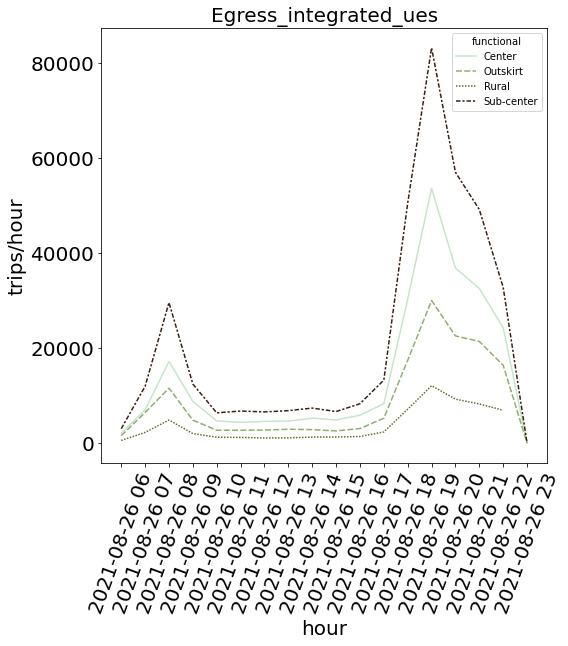

In [9]:
# plot Trips sum
fig, ax = plt.subplots(1,1,figsize=(8, 8))
g = sns.lineplot(x='hour', y="stationnam", hue="functional",style="functional",palette='ch:0.95',data=metro_area_count_O)
g.set_title('Egress_integrated_ues',fontsize = 20 )
g.set_ylabel('trips/hour', fontsize=20) #设置Y坐标轴标签字体
g.set_xlabel('hour', fontsize=20) #设置X坐标轴标签字体
g.tick_params(labelsize=20)
plt.xticks(rotation=70)
plt.savefig("High resoltion1.png",dpi=600)  #高分辨率保存

In [10]:
# 计算均值
Metro_stations_count = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\Metro_stations_count.csv",encoding = 'utf-8-sig')
Metro_stations_count = Metro_stations_count.merge(metro_area_count_O, how = 'inner',on = 'functional')
Metro_stations_count['mean']= Metro_stations_count['stationnam']/Metro_stations_count['function_1_x']
Metro_stations_count.head()

,Unnamed: 0_x,functional,function_1_x,hour,linename,stationnam,sl,poiid,lg,sp,...,START_TIME,START_LAT,START_LNG,END_TIME,END_LNG,END_LAT,BIKE_TIME,BIKE_MINU,Bike_Travel_Distance,mean
0,0,Center,43,2021-08-26 06,2090,2090,2090,2090,2090,2090,...,2090,2090,2090,2090,2090,2090,2090,2090,2090,48.604651
1,0,Center,43,2021-08-26 07,6994,6994,6994,6994,6994,6994,...,6994,6994,6994,6994,6994,6994,6994,6994,6994,162.651163
2,0,Center,43,2021-08-26 08,17206,17206,17206,17206,17206,17206,...,17206,17206,17206,17206,17206,17206,17206,17206,17206,400.139535
3,0,Center,43,2021-08-26 09,8792,8792,8792,8792,8792,8792,...,8792,8792,8792,8792,8792,8792,8792,8792,8792,204.465116
4,0,Center,43,2021-08-26 10,4675,4675,4675,4675,4675,4675,...,4675,4675,4675,4675,4675,4675,4675,4675,4675,108.720930


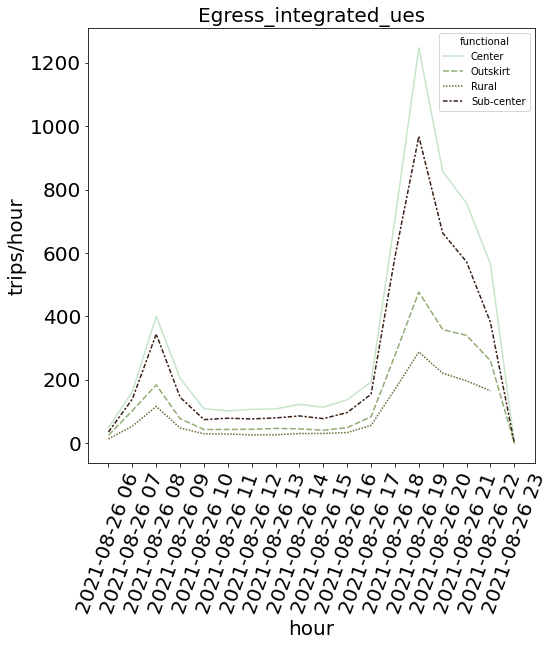

In [16]:
# plot trips mean

fig, ax = plt.subplots(1,1,figsize=(8, 8))
g = sns.lineplot(x='hour', y="mean", hue="functional",style="functional",palette='ch:0.95',data=Metro_stations_count)
g.set_title('Egress_integrated_ues',fontsize = 20 )
g.set_ylabel('trips/hour', fontsize=20) #设置Y坐标轴标签字体
g.set_xlabel('hour', fontsize=20) #设置X坐标轴标签字体
g.tick_params(labelsize=20)
plt.xticks(rotation=70)
plt.savefig("High resoltion.png",dpi=600)  #高分辨率保存

In [12]:
# save dependent variables

Egress_integrated = rail_station_buffer_2021826_O.groupby(['stationnam','hour']).count()

Egress_integrated = Egress_integrated.reset_index()
Egress_integrated_ues = pd.DataFrame()
Egress_integrated_ues['stationnam'] =Egress_integrated['stationnam']
Egress_integrated_ues['hour_O'] = Egress_integrated['hour']
Egress_integrated_ues['trips_O'] = Egress_integrated['linename']

In [13]:
Egress_integrated_ues

,stationnam,hour_O,trips_O
0,上塘,2021-08-26 06,18
1,上塘,2021-08-26 07,71
2,上塘,2021-08-26 08,258
3,上塘,2021-08-26 09,103
4,上塘,2021-08-26 10,68
...,...,...,...
3817,龙胜,2021-08-26 18,965
3818,龙胜,2021-08-26 19,1738
3819,龙胜,2021-08-26 20,1179
3820,龙胜,2021-08-26 21,942


In [14]:
Egress_integrated_ues.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\variable\Egress_integrated_ues_hour.csv",encoding = 'utf-8-sig')